# **Project Name**    -  **Play Store App Review Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**

Play Store app review is important because it gives insights of how the App is working in the Public, how is it being reviwed, liked, disliked or what are the improvements that needs to be done in an App. Which Category of App is in most demand and What are people's expectations out of it. 

Wether a new app is to be developed or existing app is to be checked on its performance data Analysis is required. Here we do Analysis to Check which App to be built for a profitable business and what all to be included in that App to meet customer expectations.



#### **Define Your Business Objective?** 

***Identifying most popular Applications category and details***

# ***Let's Begin !***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### Dataset Loading

In [2]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
# Importing the datasets
df=pd.read_csv('/content/drive/MyDrive/Play Store Data.csv')
df1=pd.read_csv('/content/drive/MyDrive/data/User Reviews (1).csv')

## ***1. Know Your Data***

### Dataset First View

In [30]:
# Dataset First 
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [31]:
df1.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Dataset Rows & Columns count

In [32]:
# Dataset Rows & Columns 
print(f'Shape of Play store Data is {df.shape} and Shape of User Review data is {df1.shape}')

Shape of Play store Data is (10841, 13) and Shape of User Review data is (64295, 5)


### Dataset Information

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


## ***2. Understanding Your Variables***

### Variables Description 

In [ ]:
# Dataset Columns
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

#### Duplicate and Unique Values

In [ ]:
# Dataset Describe
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

483

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  App is 9660 .
No. of unique values in  Category is 34 .
No. of unique values in  Rating is 40 .
No. of unique values in  Reviews is 6002 .
No. of unique values in  Size is 462 .
No. of unique values in  Installs is 22 .
No. of unique values in  Type is 3 .
No. of unique values in  Price is 93 .
No. of unique values in  Content Rating is 6 .
No. of unique values in  Genres is 120 .
No. of unique values in  Last Updated is 1378 .
No. of unique values in  Current Ver is 2832 .
No. of unique values in  Android Ver is 33 .


In [ ]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

### What did you know about your dataset?

This Data contains 10841 Rows and 13 Columns. The data contains name of the application, which category it falls in, Rating and reviews of the app, size, no of installs that speaks of the popularity of the app, price and version of the app available. 
However this data contains 483 Duplicate rows that needs to be cleared before we start our Data Wranggling. There are 34 Unique categories of Apps available in the Data and 120 genres, that gives detail explanation of the category of the application.Content Rating is also provided uniquely distributed in 5 Categories : Everyone, teen (10+), mature(17+), Only Adults(18+) and Unrated.There are two types of Application 'Paid' and 'Free' and Price of each App is also mentioned along with no of installs and Rating.

Another Dataset that contains User reviews has 64295 rows that contains Application name with its Translated review, Sentiment, Sentiment Polarity and Sentiment Subjectivity.Although it contains a lot of null Values.

Lets move forward in removing the duplicates, missing and null values.

## ***3. Understanding Your Variables***

#### Missing Values/Null Values

In [35]:
# Missing Values/Null Values Count
print(df.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


<Axes: >

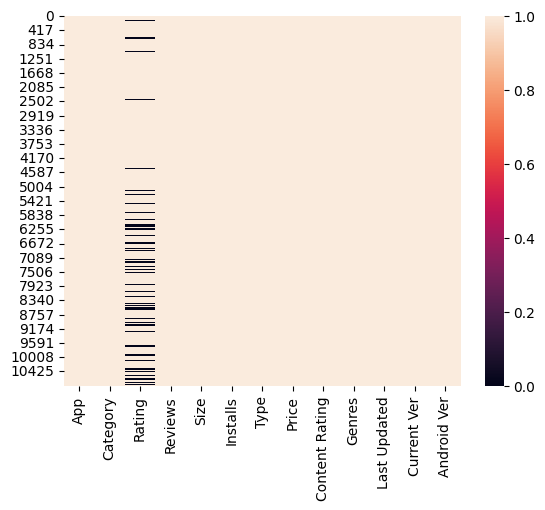

In [36]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(~df.isnull())

Here we see that maximum number of missing Values are present in column Rating, and hence that needs to be cleared by Creating a data frame that has all non null values of this column.

<Axes: >

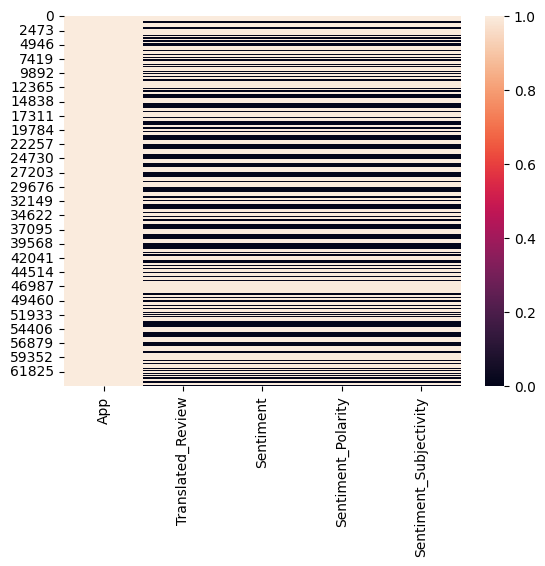

In [37]:
sns.heatmap(~df1.isnull())

Here we can see that The Apps that have null values for Translated Review have the rest of the columns also unfilled as Sentiments, Sentiment Polarity and Sentiment Subjectivity is calculated from the Reviews given. Hence we need to remove all the rows that have no Translated Review.

In [38]:
#Creating a Dataframe that has non-null "Rating Values" 

R=df[~df['Rating'].isna()]

In [39]:
#Creating Review Dataframe with all Non Null Values
Rw=df1[~df1['Translated_Review'].isna()]

In [40]:
Rw.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [41]:
R.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9367 non-null   object 
 1   Category        9367 non-null   object 
 2   Rating          9367 non-null   float64
 3   Reviews         9367 non-null   object 
 4   Size            9367 non-null   object 
 5   Installs        9367 non-null   object 
 6   Type            9367 non-null   object 
 7   Price           9367 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9367 non-null   object 
 10  Last Updated    9367 non-null   object 
 11  Current Ver     9363 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [42]:
R.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

Lets find out which row has empty value for Content Rating

In [43]:
#Lets check the null value of "Content Rating"
R[R['Content Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Here it is visible that the values are shifted, it is evident from the data that App name is missing and rest all data is shifted to left, we need to correct this.

In [44]:
#View Shifting the Row
R[R['Content Rating'].isna()].shift(periods=1,axis=1,fill_value='NO-Name')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,NO-Name,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


In [45]:
R[R['Content Rating'].isna()]=R[R['Content Rating'].isna()].shift(periods=1,axis=1,fill_value='NO-Name')

<ipython-input-45-7e5ef935c817>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R[R['Content Rating'].isna()]=R[R['Content Rating'].isna()].shift(periods=1,axis=1,fill_value='NO-Name')


In [46]:
#Filling Genres
R['Genres'].fillna('Tools',inplace=True)

<ipython-input-46-48367983d7fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R['Genres'].fillna('Tools',inplace=True)


In [47]:
R.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

In [48]:
# only current version and Android Version are left with Null Values. We can fill the columns by copying the values of the other version available. Fill the Null values of Current Version with the Android Version and vice versa.
R[R['Current Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [49]:
#Filling the Null values of Current Version with the Android Version
R.loc[R['Current Ver'].isna()]=R.loc[R['Current Ver'].isna()].fillna(method='bfill',axis=1)

In [50]:
#Filling the Null values of Android Version with the Current  Version
R.loc[R['Android Ver'].isna()]=R.loc[R['Android Ver'].isna()].fillna(method='pad',axis=1)

In [51]:
#Drop all the duplicate Rows
R.drop_duplicates(subset='App',keep='first',inplace=True)

<ipython-input-51-0bf2dc499df3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R.drop_duplicates(subset='App',keep='first',inplace=True)


In [52]:
R.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8197 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App             8197 non-null   object
 1   Category        8197 non-null   object
 2   Rating          8197 non-null   object
 3   Reviews         8197 non-null   object
 4   Size            8197 non-null   object
 5   Installs        8197 non-null   object
 6   Type            8197 non-null   object
 7   Price           8197 non-null   object
 8   Content Rating  8197 non-null   object
 9   Genres          8197 non-null   object
 10  Last Updated    8197 non-null   object
 11  Current Ver     8197 non-null   object
 12  Android Ver     8197 non-null   object
dtypes: object(13)
memory usage: 896.5+ KB


**Hurray!! All the Null, Duplicate and missing Values are now removed**

## 3. ***Data Wrangling***

### Data Wrangling Code

What are the top categories on Play Store?
Are majority of the apps Paid or Free?
How importance is the rating of the application?
Which categories from the audience should the app be based on?
Which category has the most no. of installations?
How does the count of apps varies by Genres?
How does the last update has an effect on the rating?
How are ratings affected when the app is a paid one?
How are reviews and ratings co-related?
Lets us discuss the sentiment subjectivity.
Is subjectivity and polarity proportional to each other?
What is the percentage of review sentiments?
How is sentiment polarity varying for paid and free apps?
How Content Rating affect over the App?


Lets Try to find out Answers of the following Questions :

1. Total no of Apps per Category
2. Which Category has maximum number of 5 star rated Apps 
3. Top 3 Apps with maximum number of Installs
4. Which Category has maximum no of highest installed Apps
5. Which are most expensive Applications



In [54]:
# Manupulating the Data Type
R['Rating']=R['Rating'].astype(float)
R['Reviews']=R['Reviews'].astype(int)

<ipython-input-54-42acdbbca68e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R['Rating']=R['Rating'].astype(float)
<ipython-input-54-42acdbbca68e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R['Reviews']=R['Reviews'].astype(int)


In [55]:
def remove_non_numeric_symbol (str) :
  s=[]
  for i in str :
    if i in ['1','2','3','4','5','6','7','8','9','0','.']:
      s.append(i)
    else :
      continue

  new='0'.join(s)
  
  return float(new)


In [56]:
R['Installs']=R['Installs'].apply(remove_non_numeric_symbol)
R['Price']=R['Price'].apply(remove_non_numeric_symbol)

<ipython-input-56-3f3e48a7ac4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R['Installs']=R['Installs'].apply(remove_non_numeric_symbol)
<ipython-input-56-3f3e48a7ac4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R['Price']=R['Price'].apply(remove_non_numeric_symbol)


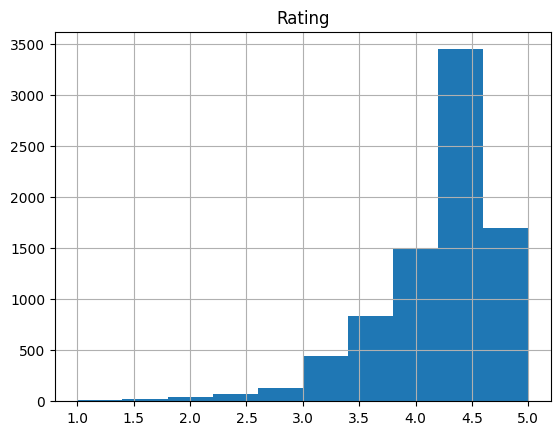

In [57]:
R.hist(column='Rating');

Most of the App Ratings lie between 4 to 4.8. This shows that people have given maximum Rating of 4 to 4.8. 
The Apps that have recieved rating below 3 are not doing well in the market and need to improvise. 
Also the apps that have got rating more than 4.5 are doing great and other apps can take the suggestions from the reviews of these apps that are outperforming in the market.

<Axes: xlabel='App'>

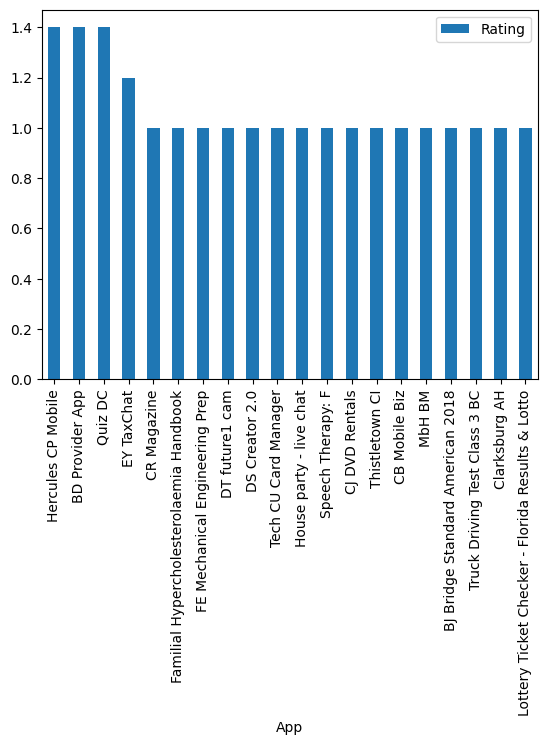

In [75]:
#Applications with worst ie; less than 1.5 Rating 
R[R['Rating']<1.5].sort_values('Rating',ascending=False)[['App','Rating']].set_index('App').plot(kind='bar')

In [76]:
#Total no of Apps per Category 
R.groupby('Category').value_counts().reset_index()['Category'].value_counts()

FAMILY                                     1608
GAME                                        912
TOOLS                                       718
FINANCE                                     302
LIFESTYLE                                   301
PRODUCTIVITY                                301
PERSONALIZATION                             298
MEDICAL                                     290
PHOTOGRAPHY                                 263
BUSINESS                                    263
SPORTS                                      260
COMMUNICATION                               256
HEALTH_AND_FITNESS                          244
NEWS_AND_MAGAZINES                          204
SOCIAL                                      203
TRAVEL_AND_LOCAL                            187
SHOPPING                                    180
BOOKS_AND_REFERENCE                         169
VIDEO_PLAYERS                               148
DATING                                      134
EDUCATION                               

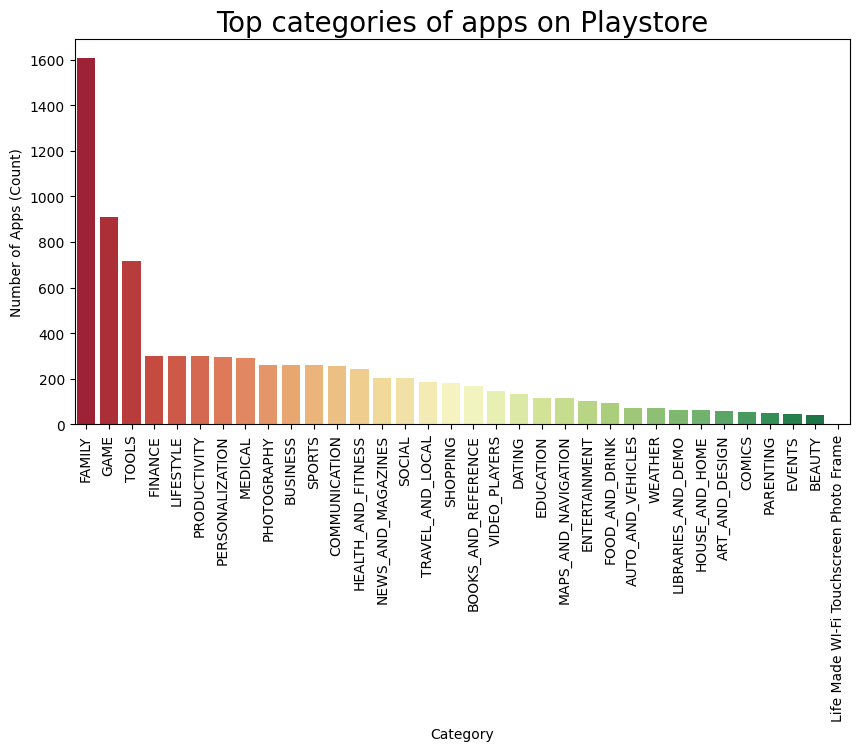

In [77]:
# Graphical representation of Category
x= R['Category'].value_counts().index
y= R['Category'].value_counts()

xsis = []
ysis = []

for i in range(len(x)):
    xsis.append(x[i])    
    ysis.append(y[i])

plt.figure(figsize = (10, 5))
plt.xlabel("Category")
plt.ylabel("Number of Apps (Count)")
plt.xticks(rotation=90)
ax = sns.barplot(x = xsis, y = ysis, palette= "RdYlGn")
ax.set_title("Top categories of apps on Playstore", fontsize = 20)
plt.show()

In [89]:
App=R['Category'].value_counts().reset_index().rename(columns={'index':'Category','Category':'No of Applications'})
App[App['No of Applications']<60]

,Category,No of Applications
29,COMICS,54
30,PARENTING,50
31,EVENTS,45
32,BEAUTY,42
33,Life Made WI-Fi Touchscreen Photo Frame,1


Maximum number of Applications are made in the Category of - Family, Games, Tools. Least Apps are made in the Category of Comics, Parenting, events and beauty with 54,50,45,42 Apps respectively. These category has larger scope for more apps to be devoloped.

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


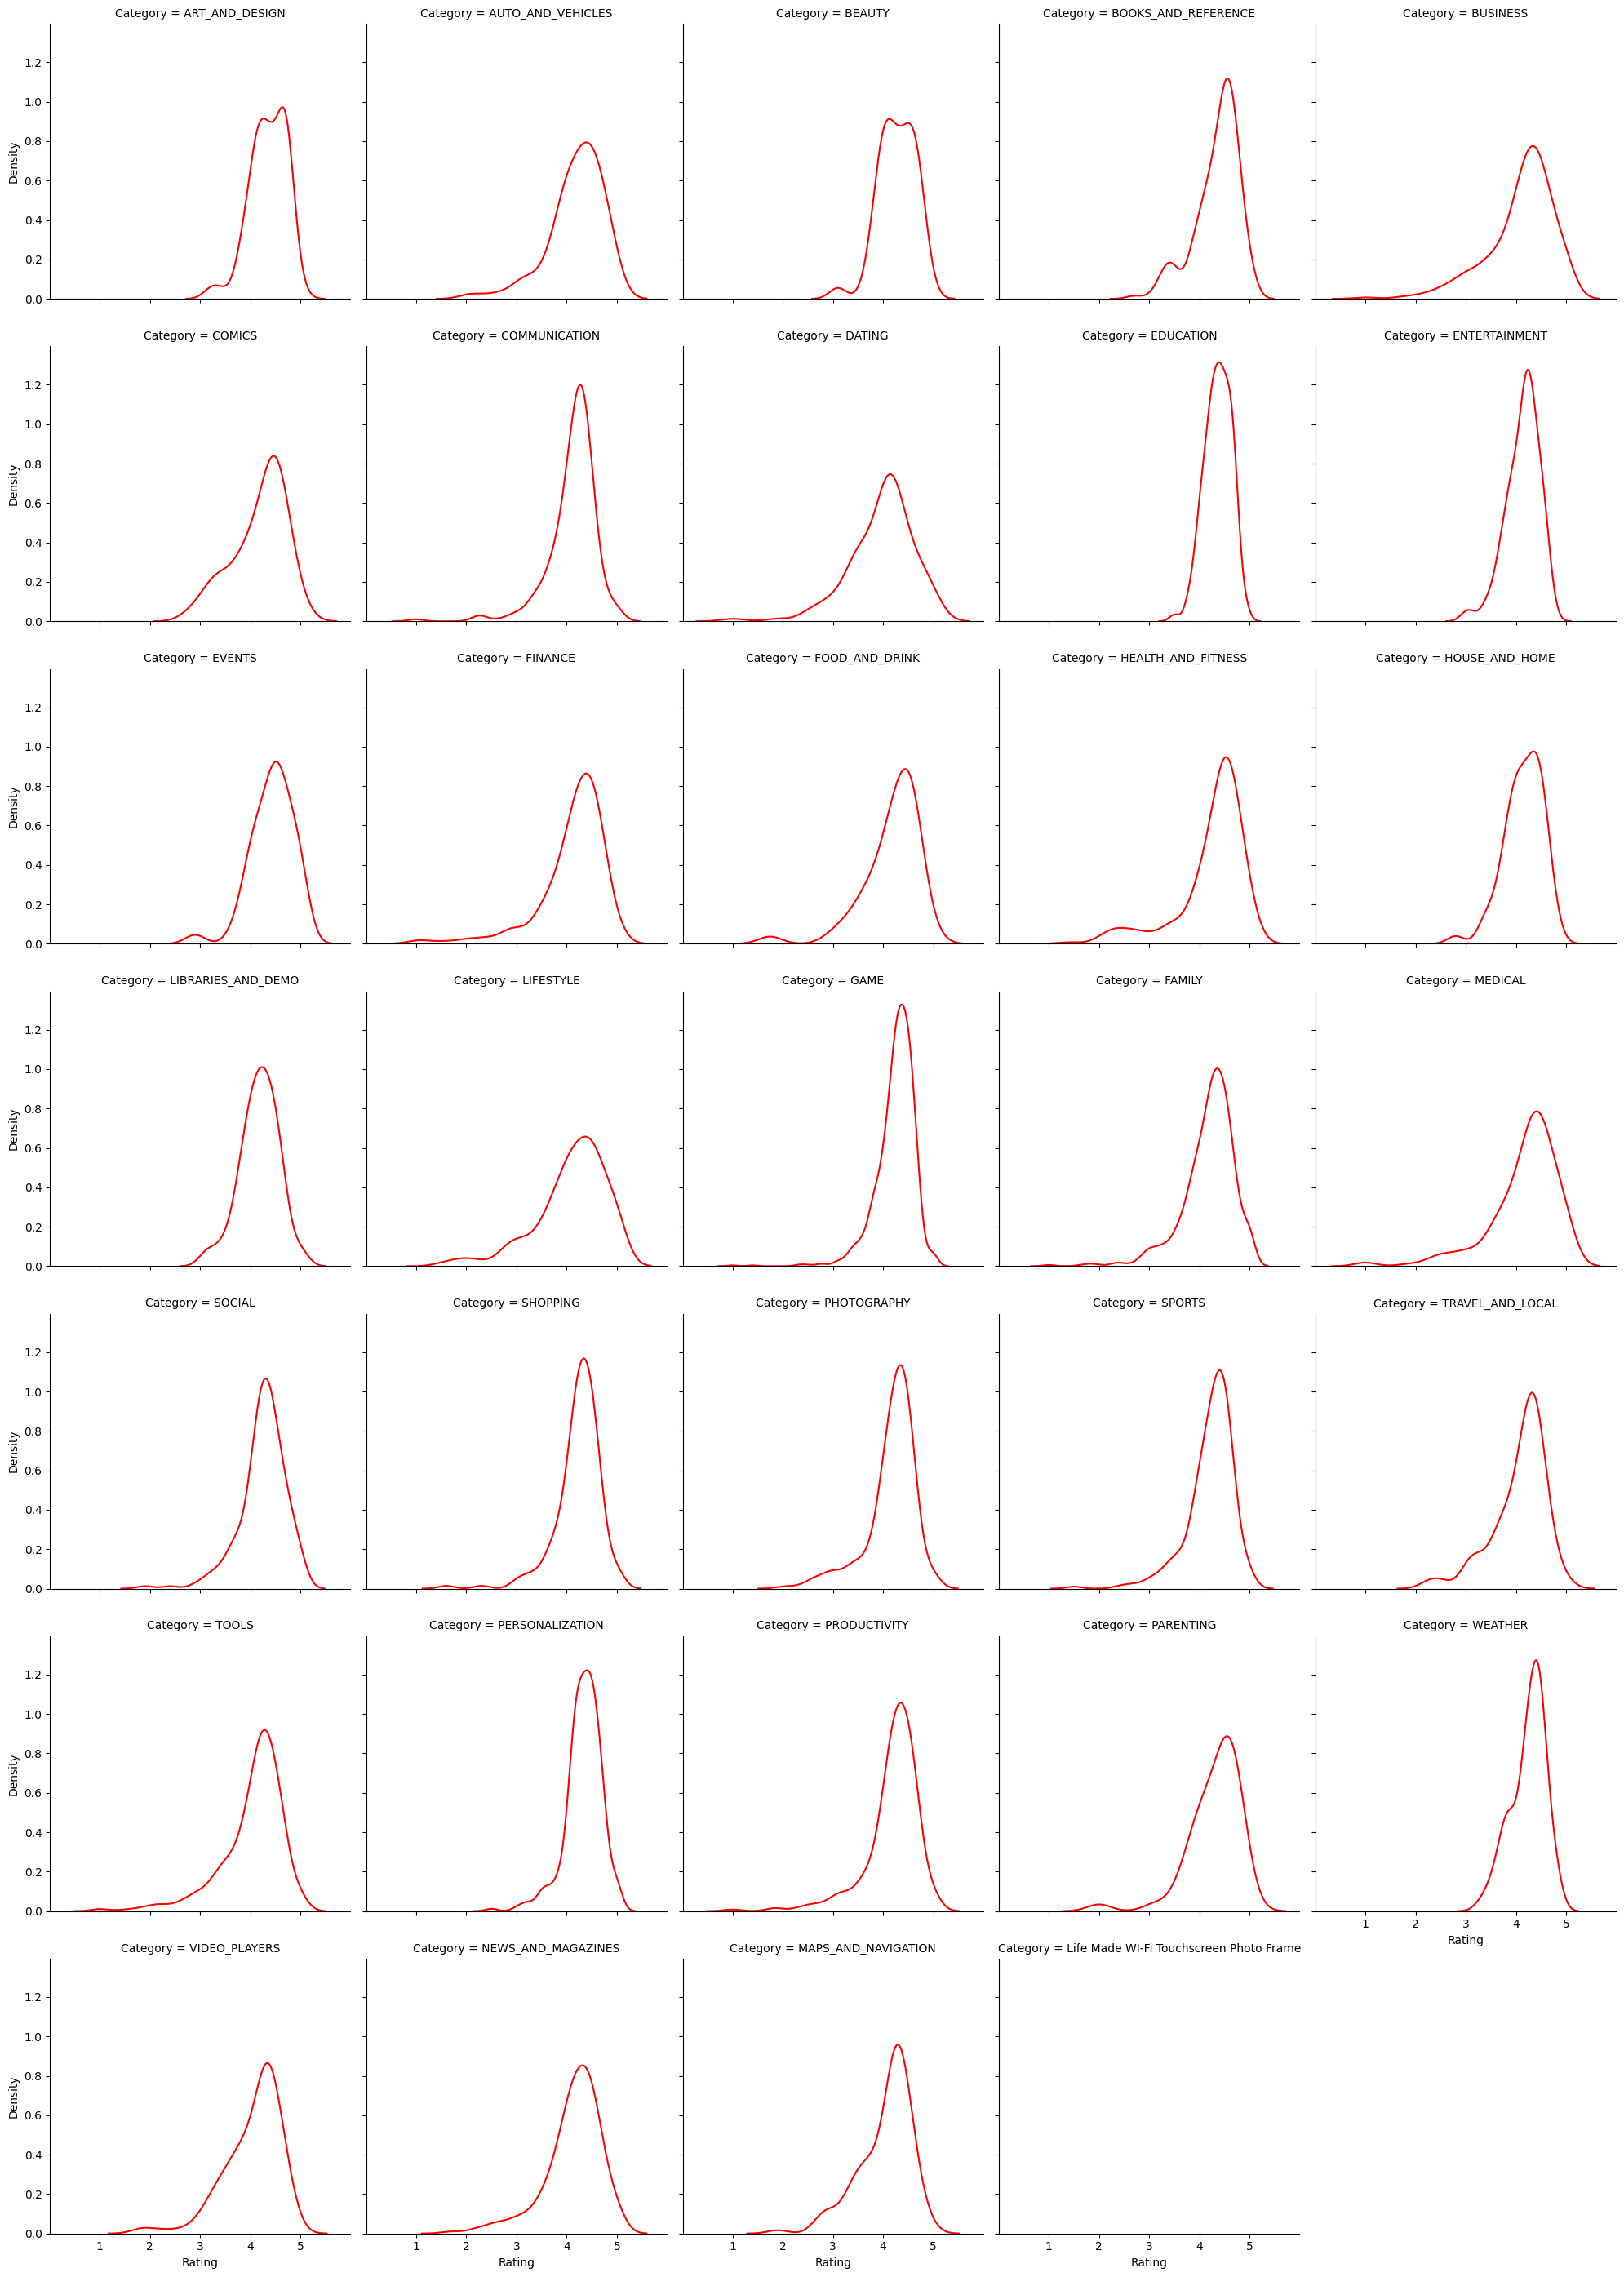

In [90]:
#Variation of Rating in each Category

g = sns.FacetGrid(R, col='Category', palette="Set1",  col_wrap=5, height=4)
g = (g.map(sns.kdeplot, "Rating", color="r"))


It can be seen that Apps like Dating, Auto and Vehicles, Lifestyle and Health & Fitness Apps have diversified Ratings. 
Apps in the Category Personalisation, Games, Education and Weather have maximum of higher ratings which narrates the following :
1. Most of these apps might be similar in use and user friendly.
2. Lesser modes that easily satisfy the Cx needs.
3. These Categories are also high in daily use and hence well updated that shows they have satisfied the Users.

In [91]:
#Which Category is most Popular in terms of Maximum no of average app Installs and Maximum no of average App Ratings

installs=R.groupby('Category')['Installs'].mean()
rating=R.groupby('Category')['Rating'].mean()


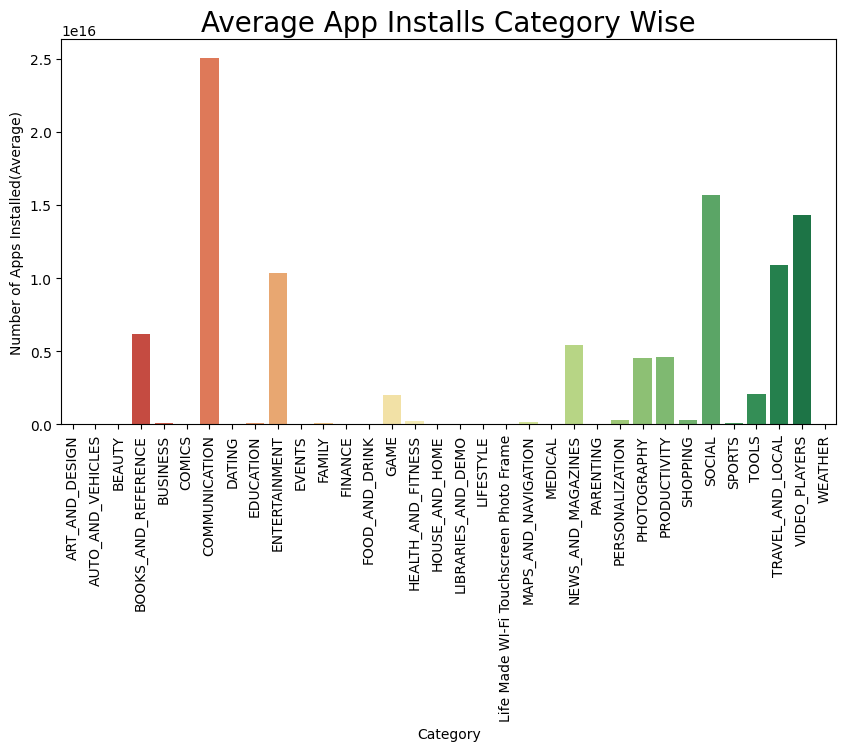

In [92]:
x= installs.index
y= installs

xsis = []
ysis = []

for i in range(len(x)):
    xsis.append(x[i])    
    ysis.append(y[i])

plt.figure(figsize = (10, 5))
plt.xlabel("Category")
plt.ylabel("Number of Apps Installed(Average)")
plt.xticks(rotation=90)
ax = sns.barplot(x = xsis, y = ysis, palette= "RdYlGn")
ax.set_title("Average App Installs Category Wise", fontsize = 20)
plt.show()

Maximum Installs are made in the Category of Communication, Social, Video players, Travel and local. 

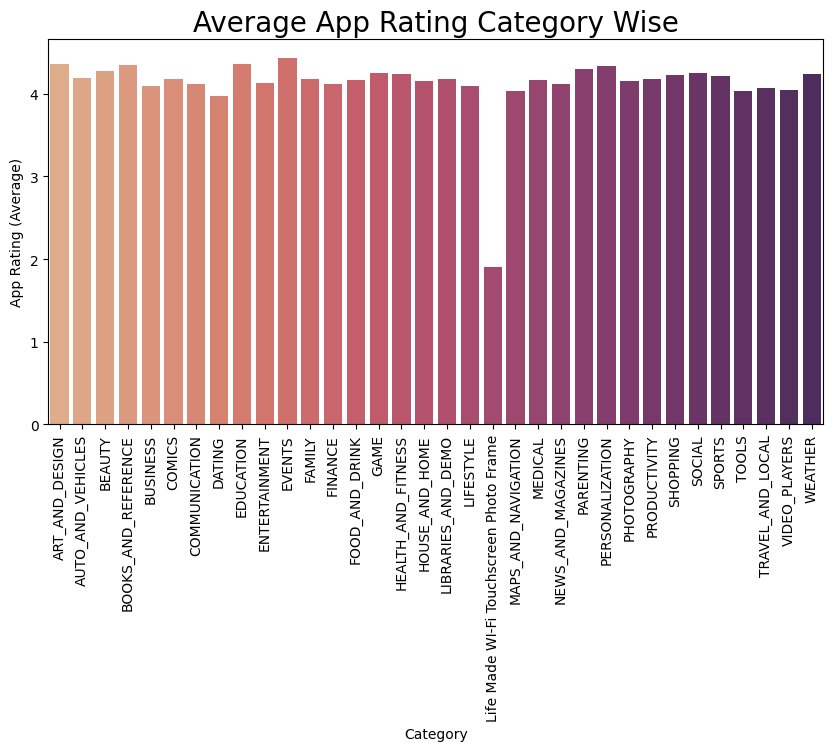

In [93]:
x= rating.index
y= rating

xsis = []
ysis = []

for i in range(len(x)):
    xsis.append(x[i])    
    ysis.append(y[i])

plt.figure(figsize = (10, 5))
plt.xlabel("Category")
plt.ylabel("App Rating (Average)")
plt.xticks(rotation=90)
ax = sns.barplot(x = xsis, y = ysis, palette= "flare")
ax.set_title("Average App Rating Category Wise", fontsize = 20)
plt.show()

Average Category App Rating is almost similar in all categories Ranging between 4.2 to 4.8

<Axes: xlabel='Category'>

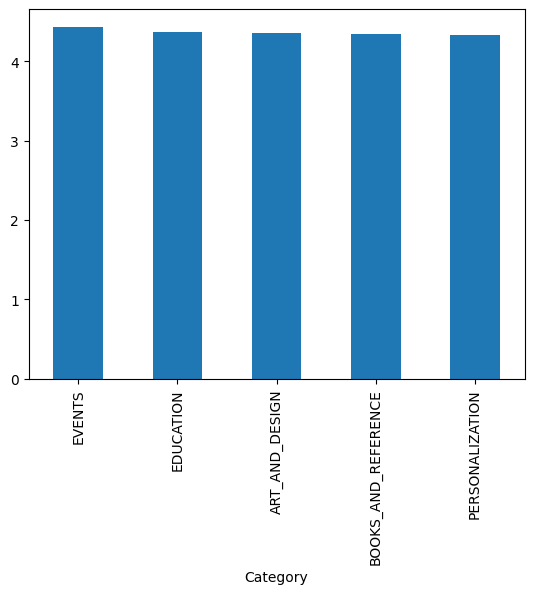

In [116]:
#Top Rated Aplications Category

rating.sort_values(ascending=False).head().plot(kind='bar')


In [94]:
# Are majority Apps free or Paid 

R.groupby('Type').value_counts().reset_index()['Type'].value_counts()

Free    7593
Paid     604
Name: Type, dtype: int64

In [95]:
def Ptype(num):
  if num==0.0 :
    return 0
  else :
    return 1

In [96]:
R['PType']= R['Price'].apply(Ptype)
price=R['PType'].value_counts()

<ipython-input-96-bee979cd2622>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R['PType']= R['Price'].apply(Ptype)


<Axes: title={'center': 'Distribution of prices'}, ylabel='PType'>

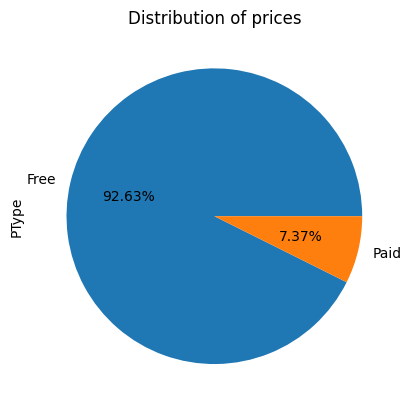

In [97]:
price.plot(kind='pie', title='Distribution of prices',autopct='%1.2f%%', labels=['Free','Paid'])

Approximately 93% of the Apps in the Playstore are Free whereas only 7% are making revenue through installs as they are Paid Apps.

This shows that maximum of the applications are not run on installation based revenue model.Lets deep dive in which categories are the maximum Paid Apps made.

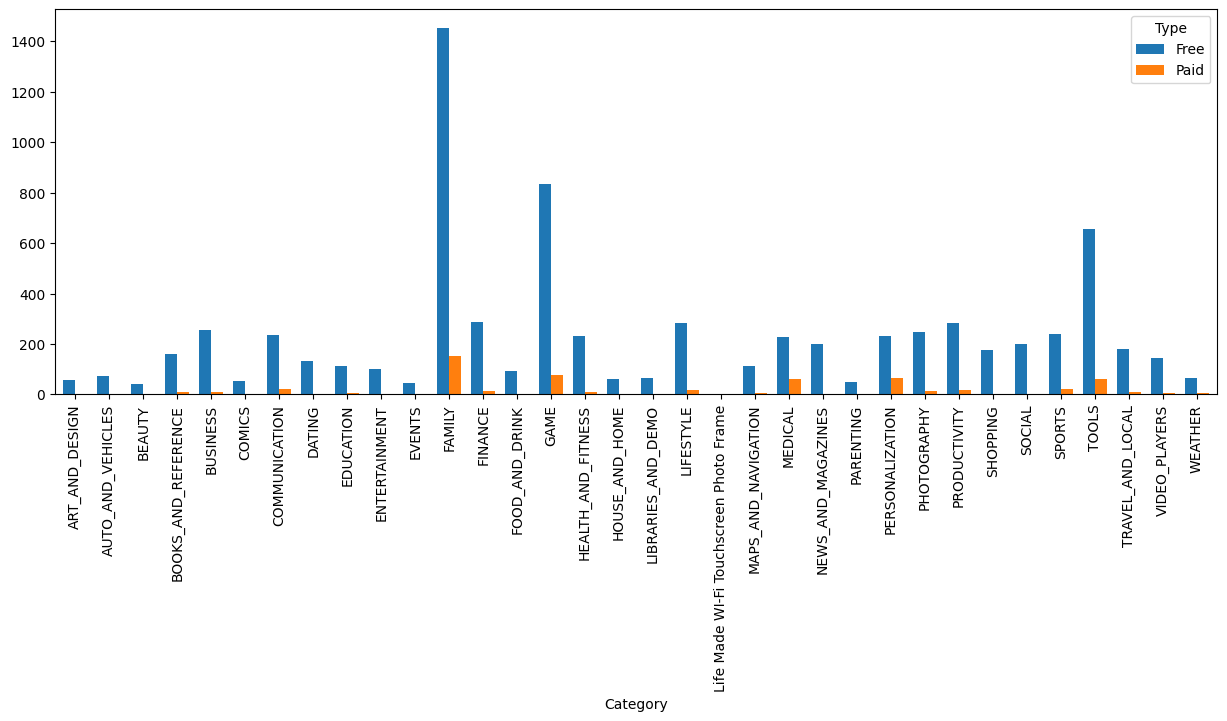

In [98]:
#print(R.groupby('Category')['Type'].value_counts())
Type_cat = R.groupby('Category')['Type'].value_counts().unstack().plot.bar(figsize=(15,5), width=0.7)
plt.show()

Maximum Paid apps are in the Category Family, games, tools, medical and Personalisation.

In [136]:
#Apps with more than 1 Billion Installs

R[(R['Price']==0) & (R['Installs']==1000000000000000000)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,PType
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1.000000e+18,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device,0
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1.000000e+18,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,0
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1.000000e+18,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,0
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1.000000e+18,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,0
340,Gmail,COMMUNICATION,4.3,4604324,Varies with device,1.000000e+18,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device,0
341,Hangouts,COMMUNICATION,4.0,3419249,Varies with device,1.000000e+18,Free,0.0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device,0
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1.000000e+18,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,0
865,Google Play Games,ENTERTAINMENT,4.3,7165362,Varies with device,1.000000e+18,Free,0.0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device,0
1654,Subway Surfers,GAME,4.5,27722264,76M,1.000000e+18,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,0
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1.000000e+18,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,0


In [140]:
R[(R['Price']>0) & (R['Installs']==100000000000000)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,PType
2241,Minecraft,FAMILY,4.5,2376564,Varies with device,1.000000e+14,Paid,60.0909,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,1
4034,Hitman Sniper,GAME,4.6,408292,29M,1.000000e+14,Paid,0.0909,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,1


Text(0.5, 1.0, 'Top 10 Genres with max no of Installs')

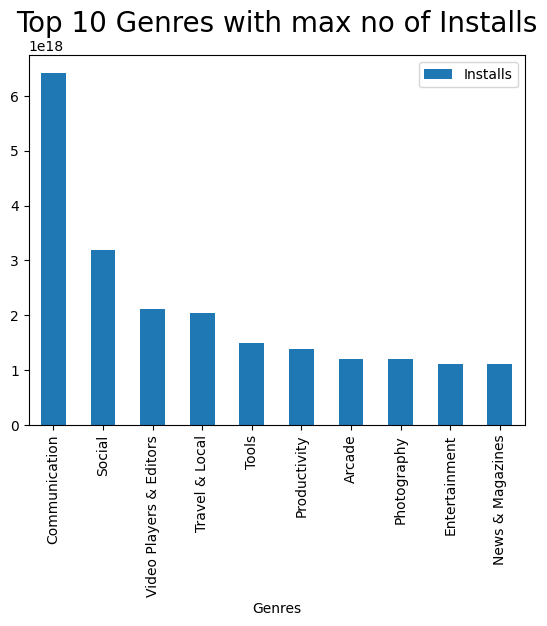

In [99]:
R.groupby('Genres')[['Installs']].sum().sort_values('Installs',ascending=False).head(10).plot(kind='bar')

plt.title("Top 10 Genres with max no of Installs", fontsize = 20)


In [100]:
R['Content Rating'].value_counts()

Everyone           6619
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

(-2.09, 35.089999999999996, 0.0, 4.657333333333333)

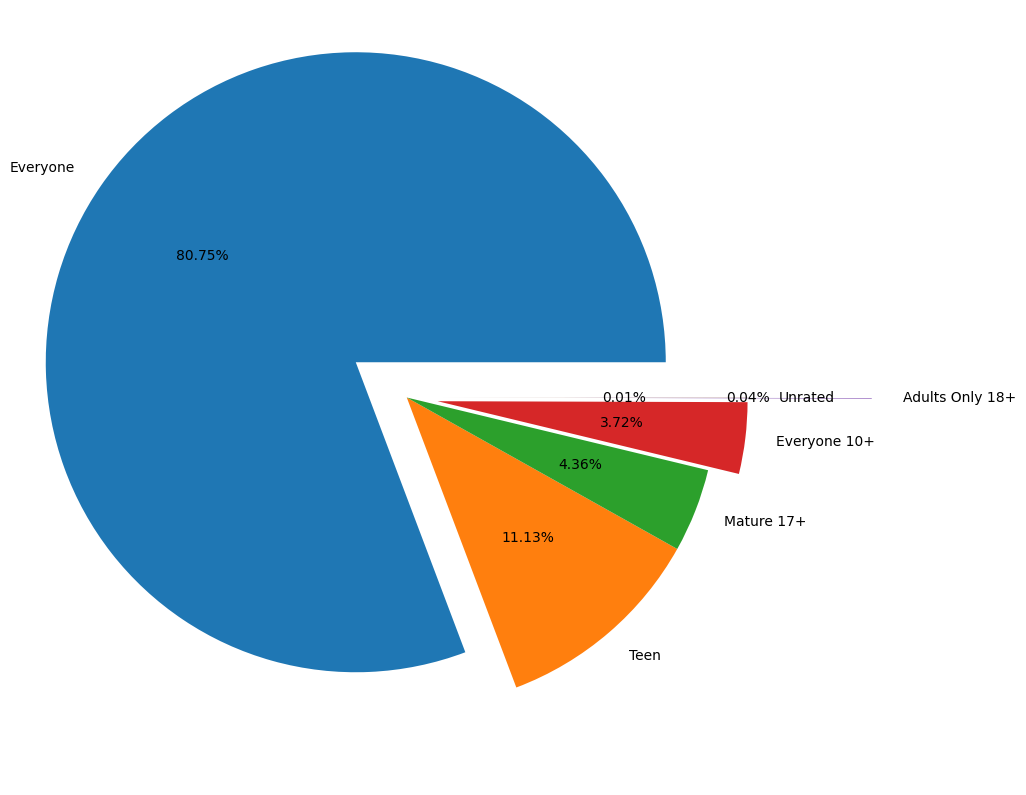

In [101]:
plt.figure(figsize=(10,30))
lab=['Everyone','Teen','Mature 17+','Everyone 10+','Adults Only 18+','Unrated']
ex=[0.2,0,0,0.1,0.5,0.1]
z=pd.value_counts(R["Content Rating"])
plt.pie(z,labels=lab,autopct='%1.2f%%',explode=ex)
ax.axis('equal')

81% of the Apps are open for all, 11% Apps are for teenagers, 4.36% for 17+, around 4% apps for everyone above 10 and 0.04 that is very very few apps are for adults that may have adult content.  

<ipython-input-106-95fcb1e8d989>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(R.corr(),annot=True)


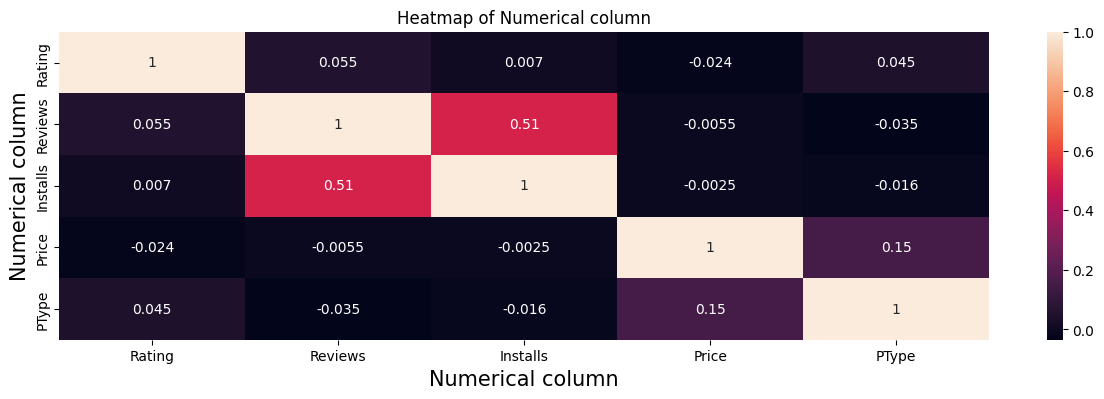

In [106]:
# heatmap syntax(always ploted on correlation)
plt.figure(figsize=(15,4))
plt.title("Heatmap of Numerical column")
sns.heatmap(R.corr(),annot=True)
plt.xlabel("Numerical column", fontsize=15)
plt.ylabel("Numerical column", fontsize=15)
plt.show();

This is a heatmap that shows correlation between different columns of the Data frame. It is evident that Reviews and Installs are positively Correlated ie; More the number of installs, more are the reviews.

In [107]:
merged_df = R.merge(Rw, on='App')

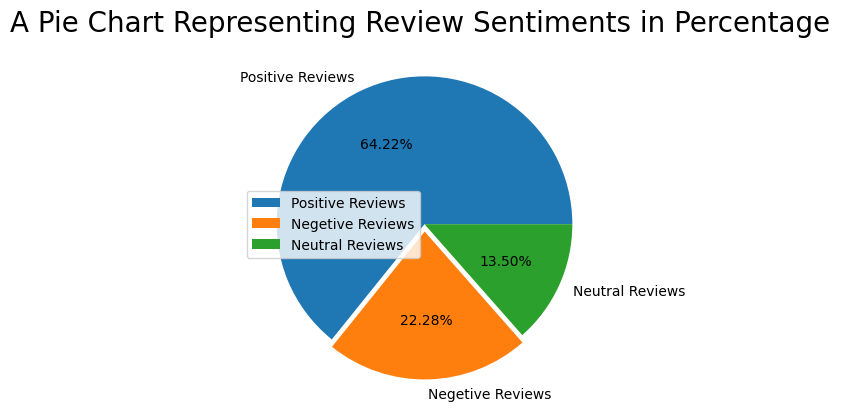

In [109]:
counts = list(merged_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negetive Reviews','Neutral Reviews'
plt.pie(counts, labels=labels, explode=[0, 0.05, 0], autopct="%.2f%%")
plt.title('A Pie Chart Representing Review Sentiments in Percentage ', fontsize=20)

plt.legend()
plt.show()

64% Apps are Positively Reviewed while 13.5 % are neutral there are 22 % Negetive reviews on Apps.

In [13]:
Rw['App'].value_counts().reset_index()

,index,App
0,Bowmasters,312
1,Helix Jump,273
2,Angry Birds Classic,273
3,Calorie Counter - MyFitnessPal,254
4,Duolingo: Learn Languages Free,240
...,...,...
860,Draw a Stickman: EPIC 2,1
861,HD Camera,1
862,Draw In,1
863,Draw A Stickman,1


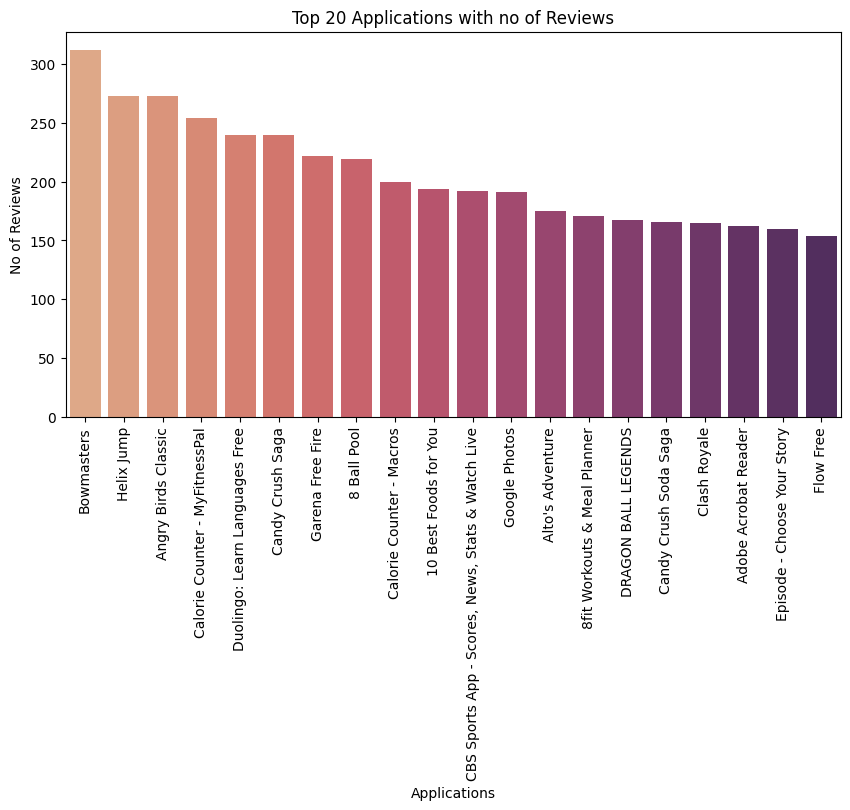

In [17]:
x= Rw['App'].value_counts().head(20).index
y= Rw['App'].value_counts().head(20)

xsis = []
ysis = []

for i in range(len(x)):
    xsis.append(x[i])    
    ysis.append(y[i])

plt.figure(figsize = (10, 5))
plt.xlabel("Applications")
plt.ylabel("No of Reviews")
plt.xticks(rotation=90)
ax = sns.barplot(x = xsis, y = ysis, palette= "flare")
ax.set_title("Top 20 Applications with no of Reviews")
plt.show()

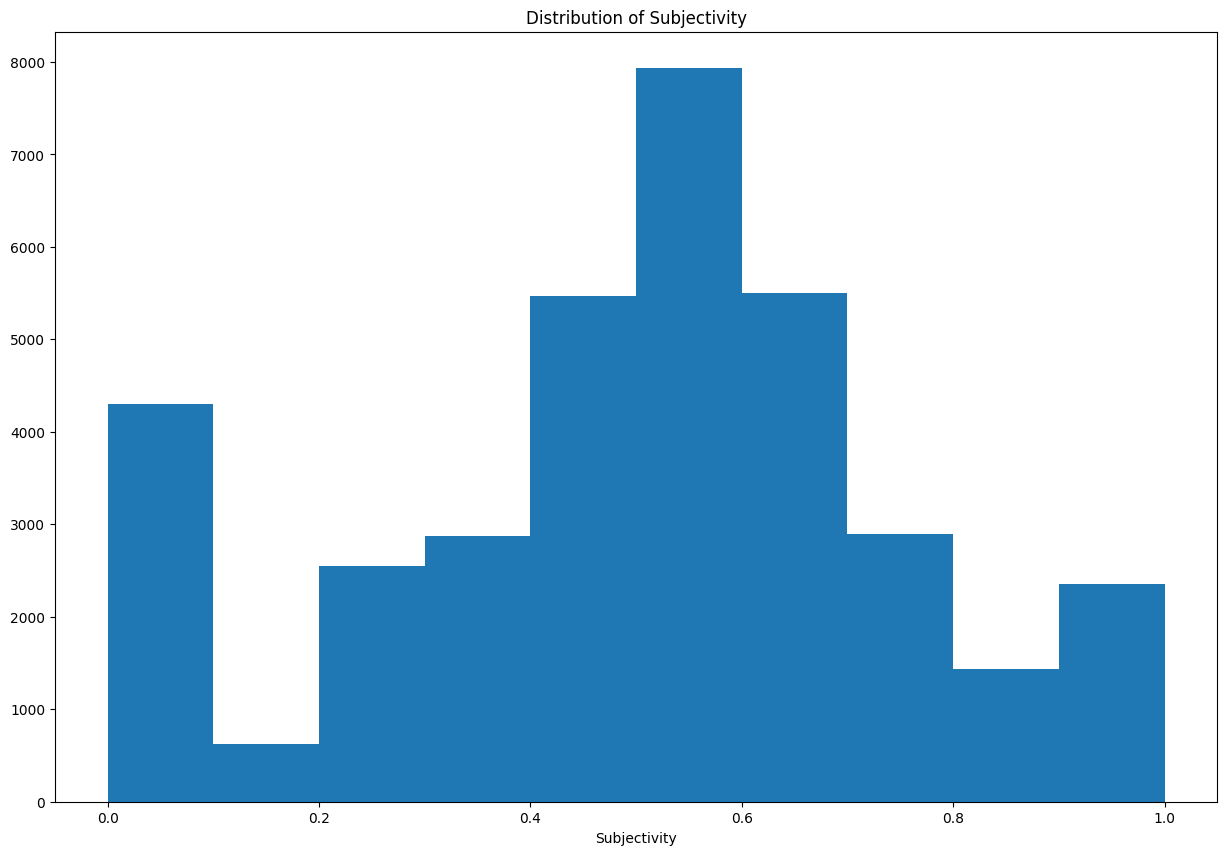

In [111]:
plt.figure(figsize=(15,10))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(merged_df[merged_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

From the Graph we can see that subjectivity lies b/w 0 to 1. Maximum reviews lie b/w subjectivity 0.4-0.7. That shows that maximum of the reviews are the experience of the users.

# *** CONCLUSION :***

Percentage of free apps = ~92%

Percentage of apps with no age restrictions = ~82%

Most competitive category: Family

Category with the highest average app installs: Communication

There are 20 free apps that have been installed over a billion times

Minecraft and Hitman Snipper are app in the paid category with over 10M installs.

Minecraft app has also produced the most revenue only from the installation fee.

1. According to the graph visualisations above, even though there are twice as many available applications from these categories as there are from the category FAMILY, the majority of trending apps (in terms of users' installs) are from the categories of GAME, COMMUNICATION, and TOOL.

2. The popularity of these apps is presumably a result of their capacity to amuse or help the user. Additionally, it demonstrates a positive trend in which we can observe that developers from these categories are placing more emphasis on the calibre than the quantity of the apps.

3. Even though the most popular apps in the categories of GAME, SOCIAL, COMMUNICATION, and TOOL reflect the preferences of Android users in terms of installs, ratings, and reviews, they do not even appear in the top 5 most popular categories in the store (which are primarily from Events, Education, Art and Design, Books, and Personalization).

4. As a conclsuion, we learnt that the current trend in the Android market are mostly from these categories which either assisting, communicating or entertaining apps.

5. Most of the apps are free so developers should focus on creating free apps to have a huge customer base. 

6. More Apps should be in the category like Events,Beauty,Parenting as they have not been explored much but still quite popular with huge installations. 

7. Developers should develop apps such that their content is available for everyone. 
